### 1. EDA
___

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import spectrai as spa

sns.set_context('notebook')
%load_ext autoreload
%autoreload 2
%matplotlib inline  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
### O. Utilities functions
def get_analyte(y, names, name):
    list(y_names).index(name)
    return y[:,list(y_names).index(name)]

### I. Loading

In [20]:
DATA_PATH = os.path.join('..', 'data')
VIETNAM_PATH =  os.path.join('vnm-petra', 'mir-models')
DATA_URL = os.path.join(DATA_PATH, VIETNAM_PATH, '*.*')
VIETNAM_MEAS_URL = os.path.join(DATA_PATH, 'vnm-petra', 'mir-models', '20090215-soil-database-mirs.xls')

X, X_names, y, y_names, instances_id, _ = spa.load_data_petra(DATA_URL, VIETNAM_MEAS_URL)
print('X shape: ', X.shape)
print(X_names)
print(y_names)
print(instances_id)

X shape:  (130, 1763)
[3997.76734131 3995.83884766 3993.910354   ...  603.61851318  601.69001953
  599.76152588]
['TC' 'TOC' 'TIC' 'TN' 'CEC' 'K' 'FCAVER' 'FCIAVER' 'FSAAVER']
['Av001' 'Av003' 'Av005' 'Av008' 'Av013' 'Av014' 'Av018' 'Av020' 'Av023'
 'Av026' 'Av027' 'Av032' 'Av036' 'Av038' 'Av040' 'Av041' 'Av042' 'Av043'
 'Av045' 'Av048' 'Av051' 'Av057' 'Av061' 'Av062' 'Av063' 'Av064' 'Av065'
 'Av067' 'Av069' 'Av072' 'Av077' 'Av080' 'Av083' 'Av086' 'Av092' 'Av098'
 'Av100' 'Av102' 'Av105' 'Av106' 'Av108' 'Av110' 'Av113' 'Av121' 'Av127'
 'Av133' 'Av139' 'Av141' 'Av143' 'Av146' 'Av147' 'Av149' 'Av152' 'Av155'
 'Av161' 'Av165' 'Av169' 'Av171' 'Av174' 'Av175' 'Av177' 'Av180' 'Av183'
 'Av189' 'Av195' 'Av203' 'Av205' 'Av208' 'Av209' 'Av211' 'Av214' 'Av217'
 'Av225' 'Av226' 'Av235' 'Av239' 'Av242' 'Av244' 'Av246' 'Av247' 'Av249'
 'Av252' 'Av255' 'Av261' 'Av265' 'Av267' 'Av268' 'Av272' 'Av365' 'Av366'
 'Av367' 'Av368' 'Av369' 'Av370' 'Av371' 'Av372' 'Av373' 'Av374' 'Av375'
 'Av376' 'Av377' 'Av3

### II. K-Means

In [3]:
print(df.shape)

(7467, 30)


* **Finding "optimal" number of clusters**

In [14]:
inertias = []
max_nb_clusters = 20
for n_cluster in range(2, max_nb_clusters):
    kmeans = KMeans(n_clusters=n_cluster, random_state=42).fit(X)
    inertias.append(kmeans.inertia_)

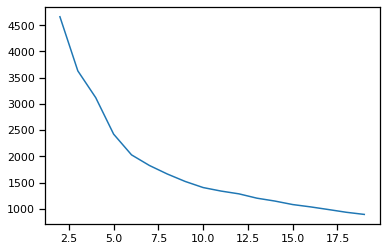

In [15]:
fig = plt.figure()
ax = plt.axes()

x = range(2, max_nb_clusters)
ax.plot(x, inertias)

In [48]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
labels = pd.Series(kmeans.labels_)

In [49]:
# Number of spectra for each cluster (i.e spectra pattern)
label_count = labels.groupby(labels).count()
label_count

0    39
1    41
2    43
3     3
4     4
dtype: int64

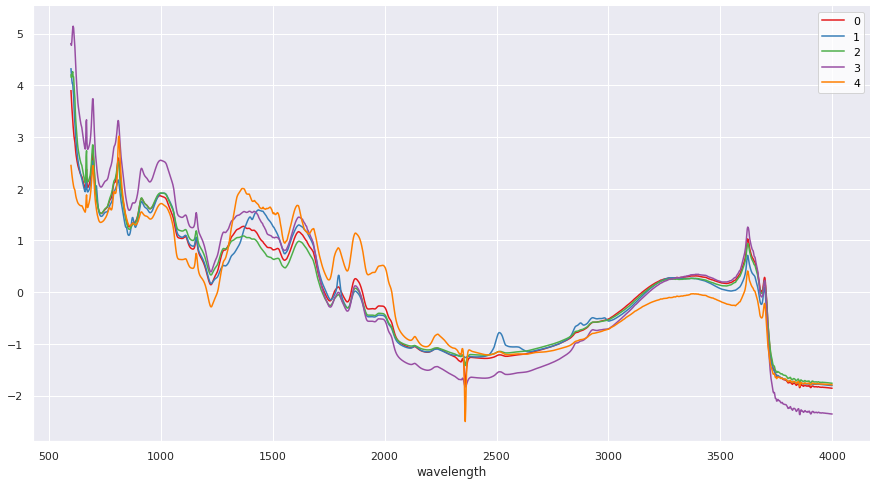

In [50]:
colors = sns.color_palette('Set1', n_clusters)

with sns.axes_style("darkgrid", {'xtick.major.size': 8.0}):
    fig, ax = plt.subplots(figsize=(15,8))

for k, label, color in zip(kmeans.cluster_centers_, range(n_clusters), colors):
    ax.plot(X_names, k, color=color, label=label)
    
plt.legend()
plt.xlabel('wavelength')
sns.despine()

In [52]:
y_names

array(['TC', 'TOC', 'TIC', 'TN', 'CEC', 'K', 'FCAVER', 'FCIAVER',
       'FSAAVER'], dtype=object)

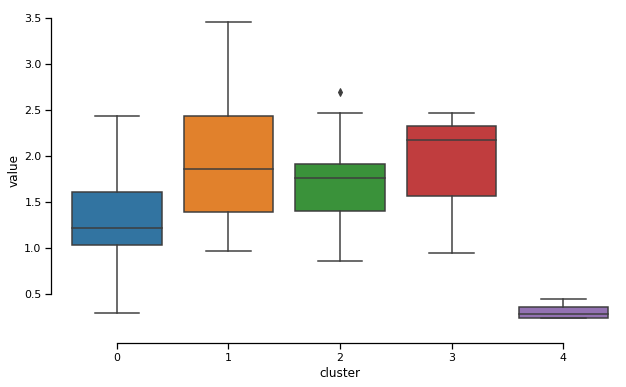

In [55]:
analyte = 'TOC'
df = pd.DataFrame({'value': get_analyte(y, y_names, analyte), 'cluster': kmeans.labels_}) 
plt.figure(figsize=(10,6))
sns.boxplot(x='cluster', y="value", data=df)
sns.despine(offset=10, trim=True)

### III. DBSCAN

In [109]:
dbscan_clustering = DBSCAN(eps=2, min_samples=2).fit(X)

In [110]:
dbscan_clustering.labels_

array([ 0,  0,  0, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  2,  2,  0,  0,
        3, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  3,  3,  3, -1, -1, -1, -1, -1, -1, -1, -1,  4,
       -1, -1, -1,  4,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  5,  6,  6,  7,  7,  8,  9,  9,  9,  9,  5,  5, -1, -1, -1,  8,
        9,  9,  9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, 10, 10, 11, 11, -1, -1, 10, -1, -1, 12, 12, -1, -1, 12, 10,
       -1, 10, -1, 10, 10, 10, -1, 10, 10, 10, 10])

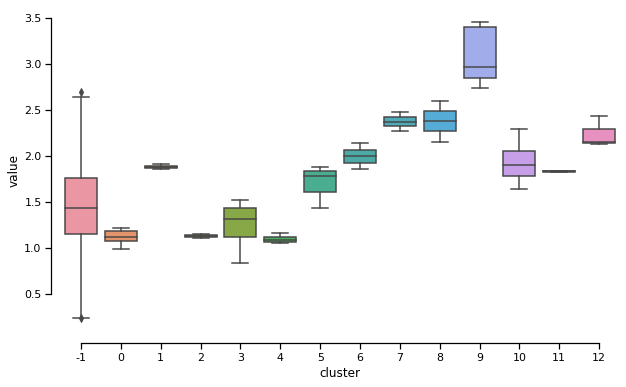

In [111]:
analyte = 'TOC'
df = pd.DataFrame({'value': get_analyte(y, y_names, analyte), 'cluster': dbscan_clustering.labels_}) 
plt.figure(figsize=(10,6))
sns.boxplot(x='cluster', y="value", data=df)
sns.despine(offset=10, trim=True)

### IV. OPTICS

In [123]:
optics_clustering = OPTICS(min_samples=2).fit(X)

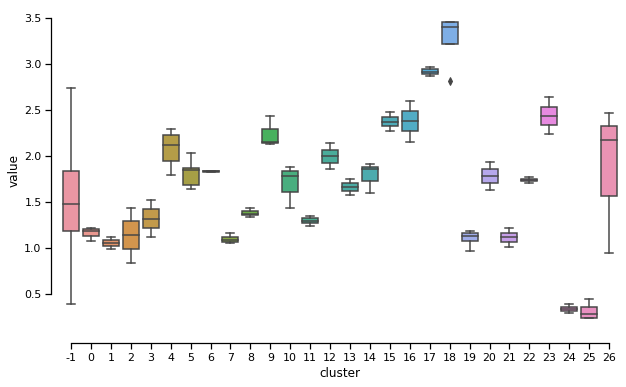

In [124]:
analyte = 'TOC'
df = pd.DataFrame({'value': get_analyte(y, y_names, analyte), 'cluster': optics_clustering.labels_}) 
plt.figure(figsize=(10,6))
sns.boxplot(x='cluster', y="value", data=df)
sns.despine(offset=10, trim=True)

### V. tSNE

In [207]:
X_embedded = TSNE(n_components=2, perplexity=30).fit_transform(X)

In [208]:
analyte = 'TOC'
df = pd.DataFrame({
    'tsne-2d-one': X_embedded[:,0], 
    'tsne-2d-two': X_embedded[:,1], 
    'value': get_analyte(y, y_names, analyte), 
    'bins': pd.cut(get_analyte(y, y_names, analyte), 6)})

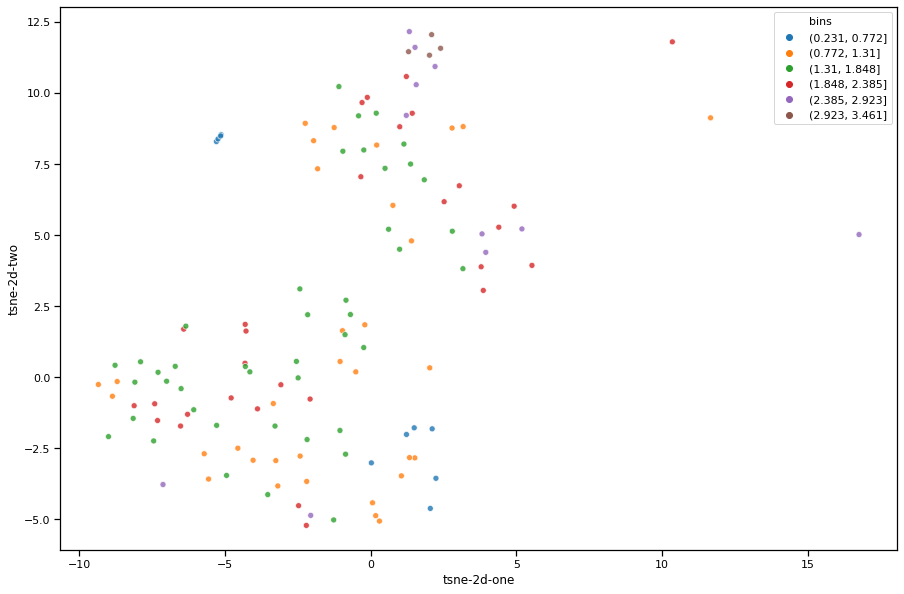

In [209]:
plt.figure(figsize=(15,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two", hue='bins',
    data=df,
    alpha=0.8);

### VI. PCA

In [215]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)

In [216]:
principalComponents.shape

(130, 5)

In [212]:
print(pca.singular_values_)

[48.18235  38.649117 27.291115 24.57789  13.854579]
